In [302]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import *

In [303]:
'''Taken from Prof. Zingale's code'''
def gauss_elim(H, b, quiet=0):
    assert b.ndim == 1, "ERROR: b should be a vector"
    N = len(b)
    # H is square, with each dimension of length N
    assert H.shape == (N, N), "ERROR: H should be square with each dim of same length as b"
    # allocation the solution array
    x = np.zeros((N), dtype=H.dtype)
    # find the scale factors for each row -- this is used when pivoting
    scales = np.max(np.abs(H), 1)
    # keep track of the number of times we swapped rows
    num_row_swap = 0

    # main loop over rows
    for k in range(N):
        # find the pivot row based on the size of column k -- only consider
        # the rows beyond the current row
        row_max = np.argmax(H[k:, k]/scales[k:])
        if k > 0:
            row_max += k  # we sliced H from k:, correct for total rows
        # swap the row with the largest scaled element in the current column
        # with the current row (pivot) -- do this with b too!
        if not row_max == k:
            H[[k, row_max], :] = H[[row_max, k], :]
            b[[k, row_max]] = b[[row_max, k]]
            scales[[k, row_max]] = scales[[row_max, k]]
            num_row_swap += 1

        # do the forward-elimination for all rows below the current
        for i in range(k+1, N):
            coeff = H[i, k] / H[k, k]

            for j in range(k+1, N):
                H[i, j] += -H[k, j] * coeff
            H[i, k] = 0.0
            b[i] += -coeff * b[k]
        
            # check if the row is all zeros -- singular
            if H[i, :].min() == 0 and H[i, :].max() == 0:
                raise ValueError("matrix is singular")
    x[N-1] = b[N-1] / H[N-1, N-1]

    for i in reversed(range(N-1)):
        bsum = b[i]
        for j in range(i+1, N):
            bsum += -H[i, j] * x[j]
        x[i] = bsum / H[i, i]
    return x

In [304]:
''' Solving for vector b given a known matrix H and vector x, H @ x = b'''
n = int(input('Enter the matrix size of the Hilbert matrix: ')) #Enter desired size of Hilbert matrix

#Define the Hilbert Matrix
def hilbert_matrix(n):
    return hilbert(n)
#Define vector x
def vector_x(n):
    return np.arange(n)
#Define vector b
def vector_b(n):
    H = hilbert_matrix(n)
    x = vector_x(n)
    return H @ x

ans = vector_b(n)
print(f'b = {ans}')

b = [2.71666667 2.1        1.72142857 1.46190476 1.2718254 ]


In [305]:
'''Solving for vector x given the known vector b and matrix H from above, H^-1 b = x'''
def sys_sol(n):
    H = hilbert(n)
    b = vector_b(n)
    return gauss_elim(H.copy(), b.copy())

print(f'x = {sys_sol(n)}')

x = [-4.65183447e-14  1.00000000e+00  2.00000000e+00  3.00000000e+00
  4.00000000e+00]


In [306]:
#Finding error propagation
for k in range(2,16):
    error = np.max(np.abs(sys_sol(k) - vector_x(k)))
    print(f'N = {k}: error = {error}')

N = 2: error = 0.0
N = 3: error = 2.220446049250313e-16
N = 4: error = 6.707967514785196e-13
N = 5: error = 2.589040093425865e-12
N = 6: error = 8.535518958296962e-10
N = 7: error = 8.078174573711294e-09
N = 8: error = 1.9450337074289337e-07
N = 9: error = 4.011823577876328e-05
N = 10: error = 0.0029059922620078282
N = 11: error = 0.009961925189480247
N = 12: error = 1.7383413354416284
N = 13: error = 32.39530980948649
N = 14: error = 47.536035778680706
N = 15: error = 32.544442675729286


The error becomes $\mathcal{O}(1)$ at $N = 12$

In [307]:
data = np.loadtxt('signal.txt')
x = data[:, 0]
f_original = data[:,1]
f_noisy = data[:, 2]
sigma = int(input('Enter desired Gaussian width: ')) #Please only enter integer values

def gaussian(n): #original kernel function
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * n**2 * sigma**2)

freq = np.fft.fftfreq(len(x), d= x[1]-x[0]) #Return the FFT sample frequencies

kernel = gaussian(freq)
kernel = kernel / np.sum(kernel)

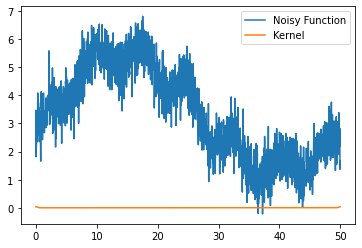

In [308]:
#Plot the noisy function along with the kernel vs. x
plt.plot(x, f_noisy, label='Noisy Function')
plt.plot(x, kernel, label='Kernel')
plt.legend()

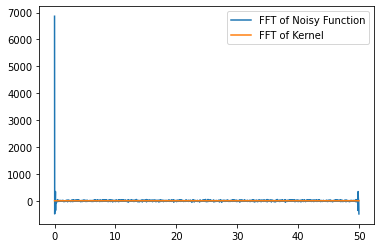

In [309]:
#Plot FFT of noisy function along with FFT of kernel vs. x
fourier_noisy= (np.fft.fft(f_noisy))
fourier_kernel = (np.fft.fft(kernel))
plt.plot(x, np.real(fourier_noisy), label = 'FFT of Noisy Function')
plt.plot(x, np.real(fourier_kernel), label = 'FFT of Kernel')
plt.legend()

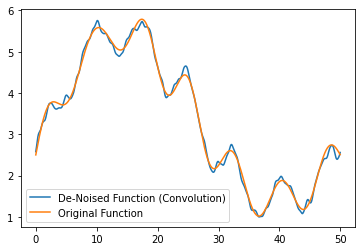

In [310]:
#Find the convolution (called de-noised) and plot convolution along with original function vs. x
fourier_multi= fourier_kernel * fourier_noisy
convolution = np.real((np.fft.ifft(fourier_multi))) # inverse FFT
plt.plot(x, convolution, label = 'De-Noised Function (Convolution)')
plt.plot(x, f_original, label = 'Original Function')
plt.legend()